In [77]:
# -------------------- Imports -------------------- #
from keras.models import Sequential
from keras.layers import Input, Dense, Flatten
from keras.models import Model
import numpy as np, pandas as pd, os
from prettytable import PrettyTable
from matplotlib import pyplot as plt
import math

In [33]:
# -------------------- Globals and Configs -------------------- #
feature_names = list()
for index in range(1, 6):
    feature_names.extend(["Suit"+str(index), "Rank"+str(index)])

feature_names.append('class')


training_input_file = os.path.abspath('../data/csv/train.csv')
testing_input_file = os.path.abspath('../data/csv/test.csv')

np.random.seed(666)     # seed for reproducible results

# To store configs
class myConfigs:
    features = 0
    classes = 0


config = myConfigs()

In [72]:
# -------------------- Data -------------------- #

train_data = pd.read_csv(training_input_file, names=feature_names)
test_data = pd.read_csv(testing_input_file, names=feature_names)

# Get features of data
config.features = len(train_data.columns) - 1
config.classes = len(set(train_data['class']))

# Shuffle training data
train_data = train_data.sample(frac=1).reset_index(drop=True)

# Seperate data and classes
train_y = np.array(train_data['class'])
train_x = np.array(train_data.drop('class', 1))

test_y = np.array(test_data['class'])
test_x = np.array(test_data.drop('class', 1))

train_y_onehot = list()
for y in range(len(train_y)):
    temp = [0] * config.classes
    temp[train_y[y]] = 1
    train_y_onehot.append(temp)
    
test_y_onehot = list()
for y in range(len(test_y)):
    temp = [0] * config.classes
    temp[test_y[y]] = 1
    test_y_onehot.append(temp)
    
train_y_onehot = np.array(train_y_onehot)
test_y_onehot = np.array(test_y_onehot)

tab = PrettyTable(['Config', 'Value'])
configs = vars(config)

for key in configs:
    tab.add_row([key, configs[key]])
print(tab)

print("Instances in training data :", len(train_data))
print("Instances in testing data :", len(test_data))

+----------+-------+
|  Config  | Value |
+----------+-------+
| features |   10  |
| classes  |   10  |
+----------+-------+
Instances in training data : 25010
Instances in testing data : 1000000


In [73]:
# -------------------- Model -------------------- #
model = Sequential()

# Input layer
model.add(Dense(10, input_shape = (train_x.shape[1],), activation='softmax'))

# Output layer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_x, train_y_onehot, epochs = 10, batch_size = 500, verbose=0)

Matches : 11403 / 25010 = 45.593762495002
Average Error : 0.6568572570971611
RMSE : 1.0399458663978547


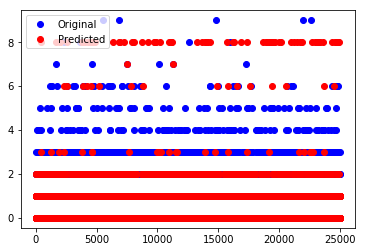

In [81]:
preds = [list(x) for x in model.predict(train_x)]
for i in range(len(preds)):
    preds[i] = preds[i].index(max(preds[i]))

train_matches = 0
for i in range(len(train_y)):
    if train_y[i] == preds[i]:
        train_matches += 1
        
print("Matches :", train_matches, '/', len(train_y), '=', train_matches/len(train_y) * 100)
print("Average Error :", sum([math.fabs(x-y) for x, y in zip(train_y, preds)])/len(train_y))
print("RMSE :", math.sqrt(sum([(x-y)**2 for x, y in zip(train_y, preds)])/len(train_y)))
    
plt.plot(train_y, 'bo', label='Original')
plt.plot(preds, 'ro', label='Predicted')
plt.legend()
plt.show()

Matches : 458489 / 1000000 = 45.8489
Average Error : 0.654053
RMSE : 1.0354540067043057


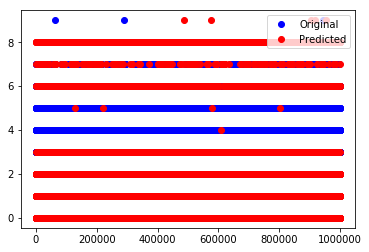

In [84]:
preds = [list(x) for x in model.predict(test_x)]
for i in range(len(preds)):
    preds[i] = preds[i].index(max(preds[i]))

test_matches = 0
for i in range(len(test_y)):
    if test_y[i] == preds[i]:
        test_matches += 1
        
print("Matches :", test_matches, '/', len(test_y), '=', test_matches/len(test_y) * 100)
print("Average Error :", sum([math.fabs(x-y) for x, y in zip(test_y, preds)])/len(test_y))
print("RMSE :", math.sqrt(sum([(x-y)**2 for x, y in zip(test_y, preds)])/len(test_y)))
    
plt.plot(test_y, 'bo', label='Original')
plt.plot(preds, 'ro', label='Predicted')
plt.legend()
plt.show()

In [85]:
scores = model.evaluate(train_x, train_y_onehot)
print("Train =", model.metrics_names[1], scores[1] * 100)

scores = model.evaluate(test_x, test_y_onehot)
print("Test =", model.metrics_names[1], scores[1] * 100)

25010/25010 [==============================] - 1s 21us/step
Train = acc 45.59376249690858
1000000/1000000 [==============================] - 20s 20us/step
Test = acc 45.8489


In [86]:
train_accuracies = list()
test_accuracies = list()

for iterations in range(50, 500, 50):
    model.fit(train_x, train_y_onehot, epochs = iterations, batch_size = 500, verbose=0)
    scores = model.evaluate(train_x, train_y_onehot, verbose=0)
    train_accuracies.append(scores[1]* 100)
    scores = model.evaluate(test_x, test_y_onehot, verbose=0)
    test_accuracies.append(scores[1]* 100)

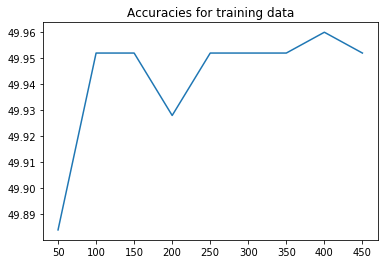

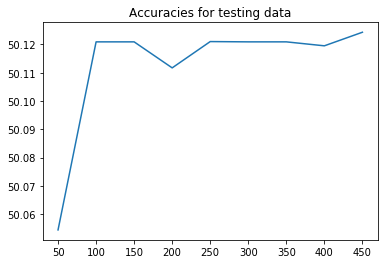

In [87]:
plt.title('Accuracies for training data')
plt.plot(range(50, 500, 50), train_accuracies)
plt.show()
plt.title('Accuracies for testing data')
plt.plot(range(50, 500, 50), test_accuracies)
plt.show()